In [1]:
import pandas as pd

df1 = pd.read_csv('../Datasets/1901-2015/KERALA.csv')
df2 = pd.read_csv('../Datasets/states_cumulative/Kerala.csv')
df1.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,73.4,386.2,2122.8,666.1
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,9.3,275.7,2403.4,638.2
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,21.7,336.3,2343.0,570.1
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,26.7,339.4,2398.2,365.3
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,23.4,378.5,1881.5,458.1


In [2]:
df1 = df1.drop(columns=['SUBDIVISION','ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec'])
monthly_avg1 = df1.melt(id_vars=['YEAR'], var_name='Month', value_name='Average')
month_map = {
    'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6,
    'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12
}
monthly_avg1['Month'] = monthly_avg1['Month'].map(month_map)
monthly_avg1.sort_values(by=['YEAR', 'Month'], inplace=True)
monthly_avg1.reset_index(drop=True, inplace=True)
monthly_avg1 = monthly_avg1[monthly_avg1['YEAR'] >= 2009]
monthly_avg1.reset_index(drop=True, inplace=True)


In [3]:
monthly_avg1

,YEAR,Month,Average
0,2009,1,3.3
1,2009,2,1.5
2,2009,3,62.6
3,2009,4,69.0
4,2009,5,191.6
...,...,...,...
79,2015,8,252.2
80,2015,9,292.9
81,2015,10,308.1
82,2015,11,223.6


In [4]:
monthly_avg2 = df2.groupby(['Year','Month'])['Average'].mean().reset_index()
monthly_avg2 = monthly_avg2[monthly_avg2['Year'] <= 2015]
monthly_avg2

,Year,Month,Average
0,2009,1,2.275836
1,2009,2,2.257959
2,2009,3,0.496298
3,2009,4,37.512120
4,2009,5,34.358852
...,...,...,...
79,2015,8,224.182039
80,2015,9,173.059973
81,2015,10,106.171786
82,2015,11,94.759417


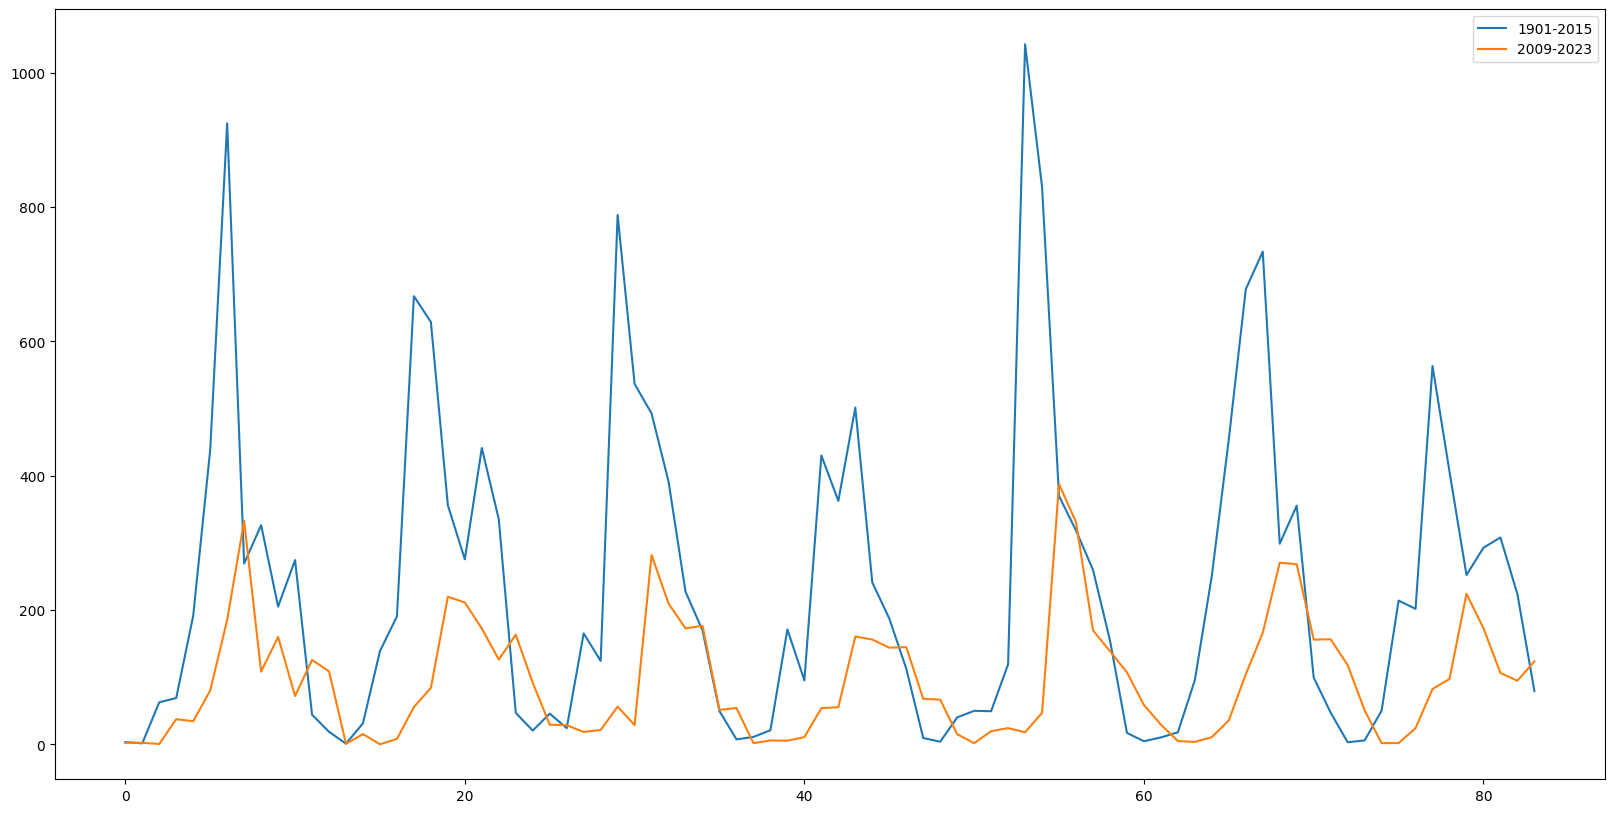

In [6]:
#plot monthly_avg1 and monthly_avg2
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(monthly_avg1['Average'], label='1901-2015') 
plt.plot(monthly_avg2['Average'], label='2009-2023')
plt.legend()
plt.show()